In [47]:
# === CELDA 1 ===
"""
Notebook: limpieza_tweetfeed.ipynb

Objetivo:
Este notebook realiza la limpieza final del dataset filtrado de Tweetfeed, aplicando revisión manual
y reglas adicionales para eliminar falsos positivos que hayan superado el score heurístico.

Dataset base: tweetfeed_filtradas.csv (2080 URLs con score_total >= 2)
Ubicación: data/processed/phishing/tweetfeed_filtradas.csv
"""


'\nNotebook: limpieza_tweetfeed.ipynb\n\nObjetivo:\nEste notebook realiza la limpieza final del dataset filtrado de Tweetfeed, aplicando revisión manual\ny reglas adicionales para eliminar falsos positivos que hayan superado el score heurístico.\n\nDataset base: tweetfeed_filtradas.csv (2080 URLs con score_total >= 2)\nUbicación: data/processed/phishing/tweetfeed_filtradas.csv\n'

In [46]:
# === CELDA 1 (Limpieza Final) ===
# Cargamos el CSV previamente filtrado por score_total >= 2

import pandas as pd

file_path_final = "../../../data/processed/phishing/tweetfeed_filtradas.csv"
df_final = pd.read_csv(file_path_final)

print("URLs cargadas para limpieza manual:", len(df_final))
df_final.head(5)


URLs cargadas para limpieza manual: 2080


,fecha,autor,tipo,valor,tags,tweet_origen,host,matched_target,categoria,registrable,...,s_kw_es,f_kw_es,s_urgente,f_urgente,s_idioma_extranjero,f_idioma_extranjero,s_marca_mal,marca_detectada_mal,f_marca_mal,score_total
0,2024-12-21 16:34:09,Phish_Destroy,url,https://www.blockchainsigns.io.defiswaps.io,#phishing,https://x.com/Phish_Destroy/status/18705080631...,www.blockchainsigns.io.defiswaps.io,NaN,NaN,defiswaps.io,...,0,False,0,False,0,False,2,ing,True,2
1,2024-12-21 17:25:12,Phish_Destroy,url,https://signup-fluence.com,#phishing,https://x.com/Phish_Destroy/status/18705209123...,signup-fluence.com,NaN,NaN,signup-fluence.com,...,0,False,0,False,0,False,2,ing,True,2
2,2024-12-21 17:30:45,Phish_Destroy,url,https://allocations-wisemonky.pages.dev,#phishing,https://x.com/Phish_Destroy/status/18705223072...,allocations-wisemonky.pages.dev,Wise,NaN,pages.dev,...,0,False,0,False,0,False,0,NaN,False,2
3,2024-12-21 22:34:29,Phish_Destroy,url,https://steamcommunity-ua.com,#phishing,https://x.com/Phish_Destroy/status/18705987468...,steamcommunity-ua.com,Steam,NaN,steamcommunity-ua.com,...,0,False,0,False,0,False,0,NaN,False,2
4,2024-12-21 23:00:07,urldna_bot,url,https://pop.spotifycloning1.freewebhostmost.com,#scam #phishing,https://x.com/urldna_bot/status/18706051972836...,pop.spotifycloning1.freewebhostmost.com,Spotify,NaN,freewebhostmost.com,...,0,False,0,False,0,False,0,NaN,False,2


In [48]:
# === CELDA 3 ===
# Contamos los dominios base más frecuentes para identificar campañas repetidas o generadores automáticos

top_registrables = df_final["registrable"].value_counts().head(30)
print("Top 30 dominios base (registrables):")
display(top_registrables)


Top 30 dominios base (registrables):


registrable
webflow.io                     93
vercel.app                     84
pages.dev                      79
github.io                      76
godaddysites.com               25
amazonaws.com                  18
azurewebsites.net              14
web.app                        14
coinbasewalletrectify.com      13
coinbaseoption.top             11
netlify.app                     9
coinbasesecure-helpdesk.com     8
googleapis.com                  8
weebly.com                      8
ubpages.com                     7
coinbasewallet.chat             5
login-coinbase-secured.com      5
glitch.me                       4
tiktokga.shop                   4
yield-coinbase.com              4
auth-coinbase-trust.com         4
coinbasepay.xyz                 3
qkipikpp.es                     3
8331202-coinbase.com            3
xw0s5cxu2o60ng.xyz              3
coinbase.tools                  3
coinbaseindexfund.com           3
wixsite.com                     3
firebaseapp.com                 3
wo

In [50]:
# === CELDA 6 ===
# Lista personalizada de dominios que vas a eliminar por ser baratos/sospechosos
dominios_a_eliminar = [
    "webflow.io", "vercel.app", "pages.dev", "github.io", "godaddysites.com",
    "netlify.app", "glitch.me", "weebly.com", "firebaseapp.com", "workers.dev",
    "wixsite.com", "web.app", "ubpages.com", "azurewebsites.net"
]

# Marcamos con una nueva columna booleana
df_final["f_dominio_barato"] = df_final["registrable"].isin(dominios_a_eliminar)

# Conteo de URLs marcadas
print("URLs marcadas para eliminación (dominios baratos):", df_final["f_dominio_barato"].sum())

# Eliminamos del DataFrame
df_final = df_final[df_final["f_dominio_barato"] == False].copy()
print("Total restante tras limpieza:", len(df_final))


URLs marcadas para eliminación (dominios baratos): 422
Total restante tras limpieza: 1658


In [51]:
# === CELDA 7 ===
# Contamos las marcas detectadas más frecuentes tras limpieza de dominios baratos
print("Top 20 marcas tras limpieza:")
df_final["brand"].value_counts(dropna=True).head(20)


Top 20 marcas tras limpieza:


brand
coinbase            568
digi                191
amazon              127
hbo                  78
steam                60
binance              52
kraken               51
visa                 38
ups                  30
mastercard           26
dhl                  16
tiktok               15
spotify              14
paypal               14
american express     11
wise                 10
zoom                  9
facebook              8
inem                  7
linkedin              7
Name: count, dtype: int64

In [58]:
# === CELDA 8 ===
# Cambia "coinbase" por la marca que quieras revisar

marca_objetivo = "inem"

ejemplos_marca = df_final[df_final["brand"] == marca_objetivo][
    ["valor", "host", "path", "matched_target", "categoria", "score_total"]
].head(50)

print(f"Ejemplos para la marca: {marca_objetivo}")
display(ejemplos_marca)


Ejemplos para la marca: inem


,valor,host,path,matched_target,categoria,score_total
799,https://vieuvenocrac.eminemlakuskudar.com/resona,vieuvenocrac.eminemlakuskudar.com,/resona,INEM,NaN,2
944,https://gothammachinemadecigars.com,gothammachinemadecigars.com,/,INEM,NaN,2
973,https://carolineminingplatform.com,carolineminingplatform.com,/,INEM,NaN,2
1043,https://finememe.site,finememe.site,/,INEM,NaN,2
1119,https://m.rainempower.com,m.rainempower.com,/,INEM,NaN,2
1476,http://msonlinemailencryption.com,msonlinemailencryption.com,/,INEM,NaN,2
1637,https://inlinemarketingmedia.hair,inlinemarketingmedia.hair,/,INEM,NaN,2


In [55]:
# === CELDA 9 ===
# Filtramos solo las URLs cuyo host contiene ".es" o termina en ".es"

df_es = df_final[df_final["host"].str.contains(r"\.es\b", case=False, na=False)].copy()

print("URLs que contienen '.es' en el dominio:", len(df_es))
df_es[["valor", "host", "brand", "score_total"]].head(31)


URLs que contienen '.es' en el dominio: 31


,valor,host,brand,score_total
22,https://robllox.com.es,robllox.com.es,NaN,2
38,https://rivers2.es,rivers2.es,NaN,2
103,https://uniwescouni.es,uniwescouni.es,NaN,2
104,https://wunivescovwes.es,wunivescovwes.es,NaN,2
110,https://gellyte.es/1adabd9b-6e58-4a7e-bbd8-c65...,gellyte.es,NaN,2
178,https://zooominvitenotice.es/project/Windows/i...,zooominvitenotice.es,NaN,2
181,https://gnorizete-tonpelati.es/default.php?id=,gnorizete-tonpelati.es,NaN,2
218,https://robiox.com.es,robiox.com.es,NaN,2
600,https://coinbasewalletsupport.es,coinbasewalletsupport.es,coinbase,4
626,https://gettrumpmem.es,gettrumpmem.es,NaN,2


In [57]:
# === CELDA 10 ===
# Marcamos URLs que:
# - tienen .es en el host
# - pero no se ha detectado ninguna marca ('brand' está vacío o NaN)

df_final["f_es_sin_marca"] = (
    df_final["host"].str.contains(r"\.es\b", case=False, na=False) &
    (df_final["brand"].isna() | (df_final["brand"] == ""))
)

print("URLs con .es pero sin marca detectada:", df_final["f_es_sin_marca"].sum())

# Vista rápida de ejemplos
df_final[df_final["f_es_sin_marca"] == True][["valor", "host", "path", "score_total"]].head(29)


URLs con .es pero sin marca detectada: 29


,valor,host,path,score_total
22,https://robllox.com.es,robllox.com.es,/,2
38,https://rivers2.es,rivers2.es,/,2
103,https://uniwescouni.es,uniwescouni.es,/,2
104,https://wunivescovwes.es,wunivescovwes.es,/,2
110,https://gellyte.es/1adabd9b-6e58-4a7e-bbd8-c65...,gellyte.es,/1adabd9b-6e58-4a7e-bbd8-c65bab532ad8/3mail@b.c,2
178,https://zooominvitenotice.es/project/Windows/i...,zooominvitenotice.es,/project/Windows/invite.php,2
181,https://gnorizete-tonpelati.es/default.php?id=,gnorizete-tonpelati.es,/default.php,2
218,https://robiox.com.es,robiox.com.es,/,2
626,https://gettrumpmem.es,gettrumpmem.es,/,2
683,http://unicismadrid.es/wp-content/com/index/ch...,unicismadrid.es,/wp-content/com/index/ch/login.html,2


In [62]:
# === CELDA 11 (versión PhishTank compatible) ===
# Preparamos un CSV con estructura igual a phishtank_clean.csv

df_es_export = df_final[df_final["f_es_sin_marca"] == True].copy()

df_export = pd.DataFrame({
    "url": df_es_export["valor"],
    "matched_target": df_es_export["brand"].fillna(""),
    "fecha_hora_recoleccion": df_es_export["fecha"],
    "fuente": "tweetfeed",
    "categoria": "",
    "notas": ""  # Aquí marcarás a mano "falso positivo" o lo que necesites
})

output_path = "../../../data/processed/tweetfeed_es_revision_phishtank_format.csv"
df_export.to_csv(output_path, index=False)

print("CSV para revisión manual generado en:", output_path)
print("Total de URLs a revisar:", len(df_export))


CSV para revisión manual generado en: ../../../data/processed/tweetfeed_es_revision_phishtank_format.csv
Total de URLs a revisar: 29


In [67]:
# === CELDA: Eliminar 29 URLs revisadas del df_final ===
import pandas as pd

# Cargar las 29 URLs desde tu CSV de revisión manual
df_revisadas = pd.read_csv("../../../data/processed/phishing/tweetfeed_es_sin_marca_para_revision.csv")

# Solo las primeras 29 filas (las revisadas a mano)
urls_revisadas = set(df_revisadas["valor"].astype(str).head(29).str.strip())

# Eliminar del dataframe que ya usaste en CELDA 6
print("Antes de eliminar:", len(df_final))
df_final = df_final[~df_final["valor"].astype(str).isin(urls_revisadas)].copy()
print("Después de eliminar:", len(df_final))


Antes de eliminar: 1658
Después de eliminar: 1629


In [69]:
# === CELDA: Top marcas tras limpieza de dominios y URLs revisadas ===
top_brands = df_final["brand"].value_counts(dropna=True).head(30)

print("Top 20 marcas restantes:")
display(top_brands)


Top 20 marcas restantes:


brand
coinbase            568
digi                191
amazon              127
hbo                  78
steam                60
binance              52
kraken               51
visa                 38
ups                  30
mastercard           26
dhl                  16
tiktok               15
spotify              14
paypal               14
american express     11
wise                 10
zoom                  9
facebook              8
inem                  7
linkedin              7
instagram             6
movistar              6
netflix               5
bit2me                5
orange                4
gls                   4
nike                  3
adidas                3
snapchat              3
ebay                  3
Name: count, dtype: int64

In [73]:
# === CELDA: Buscar menciones de empresas españolas relevantes ===

marcas_es = [
    "bbva", "santander", "caixabank", "bankinter", "unicaja", "sabadell", "abanca", "kutxabank",
    "digi", "movistar", "masmovil", "vodafone", "orange", "telefonica",
    "correos", "inem", "seg-social", "seguridadsocial", "dgt", "agenciatributaria",
    "iberdrola", "endesa", "naturgy", "repsol"
]

# Unimos host + path, normalizados
df_final["host_path_norm"] = (df_final["host"].fillna("") + " " + df_final["path"].fillna("")).str.lower()

# Filtramos si aparece alguna marca en host o path
pattern = "|".join(marcas_es)
df_empresas_es = df_final[df_final["host_path_norm"].str.contains(pattern)].copy()

print("Total URLs con marcas españolas detectadas en host o path:", len(df_empresas_es))
df_empresas_es[["valor", "host", "path", "score_total"]].head(59)


Total URLs con marcas españolas detectadas en host o path: 218


,valor,host,path,score_total
5,https://digitalweb.live,digitalweb.live,/,2
6,https://digitalmintx.com,digitalmintx.com,/,2
8,https://luandigital.site,luandigital.site,/,2
12,https://digitalborger.com,digitalborger.com,/,2
17,https://liquidus.digital,liquidus.digital,/,2
24,https://velvetdigits.com,velvetdigits.com,/,2
27,http://qfast.duckdns.org/bbva5/,qfast.duckdns.org,/bbva5/,2
29,https://bifrostwebdapp.digital,bifrostwebdapp.digital,/,2
35,https://sparkdaosflr.digital,sparkdaosflr.digital,/,2
57,https://digital-blastfoundation.com,digital-blastfoundation.com,/,2


In [82]:
# === CELDA: Helper para mostrar subset con columnas útiles CSV ===
def vista_csv(df, fuente="tweetfeed", categoria=""):
    cols = {
        "url": df.get("valor", pd.Series(dtype=str)),
        "matched_target": df.get("matched_target", pd.Series(dtype=str)).fillna(""),
        "fecha_hora_recoleccion": df.get("fecha", pd.Series(dtype=str)),
        "fuente": fuente,
        "categoria": categoria,
        "notas": ""  # para marcar a mano después ("idioma_es", "manual_ok"...)
    }
    df_vista = pd.DataFrame(cols)
    return df_vista


In [74]:
# === CELDA: Eliminar directamente las URLs de df_empresas_es ===

print("Antes de eliminar:", len(df_final))

df_final = df_final[~df_final["valor"].isin(df_empresas_es["valor"])].copy()

print("Después de eliminar:", len(df_final))


Antes de eliminar: 1629
Después de eliminar: 1411


In [75]:
df_es_reg = df_final[df_final["registrable"].str.endswith(".es", na=False)]


In [76]:
df_es_reg.head(20)

,fecha,autor,tipo,valor,tags,tweet_origen,host,matched_target,categoria,registrable,...,s_marca_mal,marca_detectada_mal,f_marca_mal,score_total,path_norm,f_path_generica,f_dominio_barato,f_es_sin_marca,host_norm,host_path_norm
600,2025-02-11 17:57:36,Phish_Destroy,url,https://coinbasewalletsupport.es,#phishing,https://x.com/Phish_Destroy/status/18893732341...,coinbasewalletsupport.es,Coinbase,NaN,coinbasewalletsupport.es,...,0,NaN,False,4,/,True,False,False,coinbasewalletsupport.es,coinbasewalletsupport.es /
1462,2025-04-13 14:39:28,skocherhan,url,http://secretosbp.es/DROPBOX/DROPBOX/vinc/,#phishing,https://x.com/skocherhan/status/19114290304877...,secretosbp.es,Dropbox,NaN,secretosbp.es,...,0,NaN,False,4,/dropbox/dropbox/vinc/,False,False,False,secretosbp.es,secretosbp.es /dropbox/dropbox/vinc/


In [77]:
urls_revisadas = {
    "https://coinbasewalletsupport.es",
    "http://secretosbp.es/DROPBOX/DROPBOX/vinc/"
}

print("Antes de eliminar:", len(df_final))

df_final = df_final[~df_final["valor"].isin(urls_revisadas)].copy()

print("Después de eliminar:", len(df_final))

Antes de eliminar: 1411
Después de eliminar: 1409


In [81]:
# === CELDA: Buscar pistas de idioma español en URL (vista con TODAS las columnas) ===
import re

# 1) Query params
LANG_ES_QUERY = re.compile(r"(lang|locale|hl|ln|idioma|language)(=|%3D)(es|es[-_]?es|sp)", re.I)
mask_query = df_final["valor"].str.contains(LANG_ES_QUERY, na=False)

# 2) Rutas
LANG_ES_PATH = re.compile(r"(^|/)(es|es[-_](es|mx|ar|cl|co|pe))(/|$)", re.I)
mask_path = df_final["path"].fillna("").str.contains(LANG_ES_PATH, na=False)

# 3) Subdominio
mask_sub = df_final["host"].fillna("").str.startswith("es.", na=False)

# Combina todo
mask_lang_es = mask_query | mask_path | mask_sub

df_lang_es = df_final[mask_lang_es].copy()

# --- Orden de columnas “preferido” (solo se usarán las que existan) ---
preferidas = [
    "fecha","autor","tipo","valor","tags","tweet_origen","host","matched_target","categoria","registrable",
    # … añade aquí otras que suelas consultar primero:
    "brand","s_marca_mal","marca_detectada_mal","f_marca_mal","score_total","path_norm",
    "f_path_generica","f_dominio_barato","f_es_sin_marca","host_norm","host_path_norm"
]
cols_exist = [c for c in preferidas if c in df_lang_es.columns]
otras = [c for c in df_lang_es.columns if c not in cols_exist]
df_lang_es_view = df_lang_es[cols_exist + otras].copy()

print("Total URLs con pistas de idioma español:", len(df_lang_es_view))
display(df_lang_es_view)  # muestra TODAS las columnas disponibles en ese orden


Total URLs con pistas de idioma español: 1


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_25991/1452277657.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_query = df_final["valor"].str.contains(LANG_ES_QUERY, na=False)
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_25991/1452277657.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_path = df_final["path"].fillna("").str.contains(LANG_ES_PATH, na=False)


,fecha,autor,tipo,valor,tags,tweet_origen,host,matched_target,categoria,registrable,...,f_es_tld,f_locale_es,f_euro,f_plus34,s_kw_es,f_kw_es,s_urgente,f_urgente,s_idioma_extranjero,f_idioma_extranjero
1794,2025-06-14 14:26:04,CarlyGriggs13,url,https://dhl.com-esoo.top/es,#phishing #scam,https://x.com/CarlyGriggs13/status/19338937061...,dhl.com-esoo.top,DHL,NaN,com-esoo.top,...,False,True,False,False,0,False,0,False,0,False


In [83]:
# === CELDA: Eliminar URL revisada con idioma español (DHL) ===

url_revisada = "https://dhl.com-esoo.top/es"

print("Antes de eliminar:", len(df_final))

df_final = df_final[~df_final["valor"].eq(url_revisada)].copy()

print("Después de eliminar:", len(df_final))


Antes de eliminar: 1409
Después de eliminar: 1408


Distribución de score_total (urls restantes):


score_total
2    1388
4      17
5       3
Name: count, dtype: int64

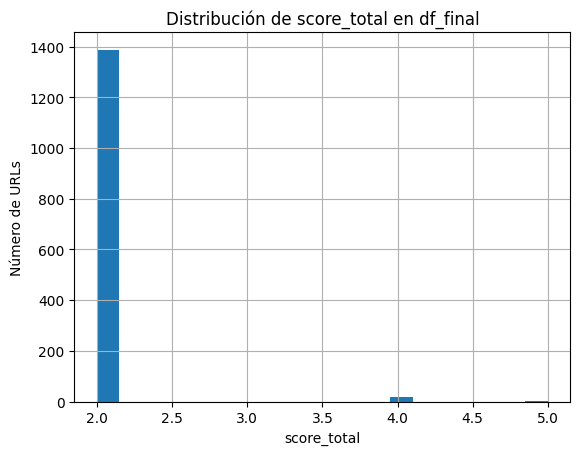

In [84]:
# === CELDA: Distribución de score_total en df_final ===

# Conteo de frecuencias de cada score_total
score_counts = df_final["score_total"].value_counts().sort_index()

print("Distribución de score_total (urls restantes):")
display(score_counts)

# También como histograma para visualizar mejor
import matplotlib.pyplot as plt

df_final["score_total"].hist(bins=20)
plt.xlabel("score_total")
plt.ylabel("Número de URLs")
plt.title("Distribución de score_total en df_final")
plt.show()


In [85]:
# === CELDA: Filtrar URLs con score_total 4 o 5 ===

df_score45 = df_final[df_final["score_total"].isin([4,5])].copy()

print("Total con score_total 4 o 5:", len(df_score45))

# Vista con columnas útiles para el CSV unificado
df_vista_score45 = pd.DataFrame({
    "url": df_score45["valor"],
    "matched_target": df_score45["matched_target"].fillna(""),
    "fecha_hora_recoleccion": df_score45["fecha"],
    "fuente": "tweetfeed",
    "categoria": df_score45.get("categoria", ""),
    "notas": ""
})

display(df_vista_score45)


Total con score_total 4 o 5: 20


,url,matched_target,fecha_hora_recoleccion,fuente,categoria,notas
96,https://kyberswap.campaigns-dashboard.co,HBO,2025-01-05 11:10:31,tweetfeed,NaN,
279,http://au-en-dashboard.com/sign-in-stage-1.php,HBO,2025-01-26 05:10:08,tweetfeed,NaN,
392,https://coinbase-pro-sign-in.company.site,Coinbase,2025-02-02 21:39:23,tweetfeed,NaN,
616,http://s3-us-east-2.amazonaws.com/data-used-ph...,Amazon,2025-02-12 19:24:55,tweetfeed,E-commerce / Retail,
623,https://coinbase-signin.us,Coinbase,2025-02-12 21:56:16,tweetfeed,NaN,
643,https://coinbase-signinreview.com,Coinbase,2025-02-13 17:00:37,tweetfeed,NaN,
718,https://signups-monadvm.com,UPS,2025-02-19 21:24:58,tweetfeed,NaN,
729,https://signups-monadvm.net,UPS,2025-02-20 12:54:10,tweetfeed,NaN,
969,https://webmail.verificarecapiti-coinbase.com,Coinbase,2025-03-10 09:29:27,tweetfeed,NaN,
1083,https://coinbase-signin-page.paypalt.com,PayPal,2025-03-18 19:45:35,tweetfeed,Pago Online,


In [86]:
# === CELDA: Eliminar URLs con score_total 4 o 5 (no sirven) ===

print("Antes de eliminar:", len(df_final))

df_final = df_final[~df_final["score_total"].isin([4,5])].copy()

print("Después de eliminar:", len(df_final))


Antes de eliminar: 1408
Después de eliminar: 1388


In [87]:
# === CELDA: Filtrar URLs con registrable .es (incluye .com.es, .org.es, etc.) ===

df_es = df_final[df_final["registrable"].str.endswith(".es", na=False)].copy()

print("Total URLs con registrable .es:", len(df_es))

df_vista_es = pd.DataFrame({
    "url": df_es["valor"],
    "matched_target": df_es["matched_target"].fillna(""),
    "fecha_hora_recoleccion": df_es["fecha"],
    "fuente": "tweetfeed",
    "categoria": df_es.get("categoria", ""),
    "notas": ""
})

display(df_vista_es.head(20))


Total URLs con registrable .es: 0


,url,matched_target,fecha_hora_recoleccion,fuente,categoria,notas


In [90]:
# === CELDA: Filtrar por palabras clave españolas en path ===
import re

ES_KW = re.compile(
    r"(dni|dgt|correos|regularizaci[oó]n|multa|pago?s?|verificaci[oó]n|acceso|login|cliente?s?|seguridadsocial|agenciatributaria)",
    re.I
)

df_kw_es = df_final[df_final["path"].fillna("").str.contains(ES_KW)].copy()

print("Total URLs con palabras clave españolas en path:", len(df_kw_es))

df_vista_kw = pd.DataFrame({
    "url": df_kw_es["valor"],
    "matched_target": df_kw_es["matched_target"].fillna(""),
    "fecha_hora_recoleccion": df_kw_es["fecha"],
    "fuente": "tweetfeed",
    "categoria": df_kw_es.get("categoria", ""),
    "notas": "path_keyword"
})

display(df_vista_kw.head(38))


Total URLs con palabras clave españolas en path: 38


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_25991/2597092636.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_kw_es = df_final[df_final["path"].fillna("").str.contains(ES_KW)].copy()


,url,matched_target,fecha_hora_recoleccion,fuente,categoria,notas
119,https://netflix-reglamentos.info/pages/,Netflix,2025-01-07 04:23:29,tweetfeed,Streaming / Entretenimiento,path_keyword
120,https://ladizone.com/ei2ivfc2/facebook-login,Facebook,2025-01-07 04:24:08,tweetfeed,Redes Sociales,path_keyword
240,https://trademarkapartment.com/amazon-login/,Amazon,2025-01-23 23:19:13,tweetfeed,E-commerce / Retail,path_keyword
241,https://trademarkblackjack.com/amazon-login/,Amazon,2025-01-23 23:19:13,tweetfeed,E-commerce / Retail,path_keyword
242,https://trademarkistanbul.com/amazon-login/,Amazon,2025-01-23 23:19:13,tweetfeed,E-commerce / Retail,path_keyword
243,https://trademarklasvegas.com/amazon-login/,Amazon,2025-01-23 23:23:17,tweetfeed,E-commerce / Retail,path_keyword
244,https://tradepersonalinjury.com/amazon-login/,Amazon,2025-01-23 23:23:17,tweetfeed,E-commerce / Retail,path_keyword
366,https://lifecard-dealwise.dentexchange.net/Web...,Wise,2025-02-01 00:34:19,tweetfeed,NaN,path_keyword
678,https://orico-jurwise.haipengmi.com/eorico/login/,Wise,2025-02-15 08:15:23,tweetfeed,NaN,path_keyword
926,https://bodysmile-kyoto.com/amazon-login,Amazon,2025-03-07 12:34:27,tweetfeed,E-commerce / Retail,path_keyword


In [91]:
# === CELDA: Eliminar todas las URLs detectadas por palabras clave (ya revisadas) ===

print("Antes de eliminar:", len(df_final))

df_final = df_final[~df_final["valor"].isin(df_kw_es["valor"])].copy()

print("Después de eliminar:", len(df_final))


Antes de eliminar: 1388
Después de eliminar: 1350


In [93]:
# === CELDA: Filtrar por palabras clave ES+EN en path ===
import re

KW_MIX = re.compile(
    r"(dni|dgt|correos|seguridadsocial|agenciatributaria|multa|regularizaci[oó]n|"
    r"pago?s?|verificaci[oó]n|acceso|login|cliente?s?|"
    r"secure|account|signin|sign-in|update|billing|password|credential|invoice)",
    re.I
)

df_kw_mix = df_final[df_final["path"].fillna("").str.contains(KW_MIX)].copy()

print("Total URLs con keywords ES+EN en path:", len(df_kw_mix))

df_vista_kw_mix = pd.DataFrame({
    "url": df_kw_mix["valor"],
    "matched_target": df_kw_mix["matched_target"].fillna(""),
    "fecha_hora_recoleccion": df_kw_mix["fecha"],
    "fuente": "tweetfeed",
    "categoria": df_kw_mix.get("categoria", ""),
    "notas": "path_keyword_mixed"
})

display(df_vista_kw_mix.head(28))


Total URLs con keywords ES+EN en path: 28


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_25991/1412177385.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_kw_mix = df_final[df_final["path"].fillna("").str.contains(KW_MIX)].copy()


,url,matched_target,fecha_hora_recoleccion,fuente,categoria,notas
74,https://atoz-support.com/.bb-bb-hu/mkb/signin....,,2025-01-02 23:49:35,tweetfeed,NaN,path_keyword_mixed
123,https://facebookconfirm.com/meta-team-pro/secu...,Facebook,2025-01-07 05:32:35,tweetfeed,Redes Sociales,path_keyword_mixed
133,https://www2.aeotikfdki.shop/ap/signin/,,2025-01-08 05:17:12,tweetfeed,NaN,path_keyword_mixed
134,https://www2.aeotikfdki.shop/ap/signin,,2025-01-08 05:17:12,tweetfeed,NaN,path_keyword_mixed
135,https://www2.yieutos2.shop/ap/signin/,,2025-01-08 05:18:20,tweetfeed,NaN,path_keyword_mixed
136,https://www2.yieutos2.shop/ap/signin,,2025-01-08 05:18:20,tweetfeed,NaN,path_keyword_mixed
280,http://au-auth-callback.com/sign-in-stage-1.php,,2025-01-26 05:10:08,tweetfeed,NaN,path_keyword_mixed
574,https://fuckoffama.s3.ap-southeast-2.amazonaws...,Amazon,2025-02-11 05:26:55,tweetfeed,E-commerce / Retail,path_keyword_mixed
705,https://chasm.world/wp-content/themes/twentytw...,,2025-02-19 11:26:35,tweetfeed,NaN,path_keyword_mixed
1253,https://myjcb.dmjvpuio.xyz/signin,,2025-03-27 08:24:19,tweetfeed,NaN,path_keyword_mixed


In [94]:
# === CELDA: Eliminar URLs con keywords mixtas (no válidas) ===

print("Antes de eliminar:", len(df_final))

df_final = df_final[~df_final["valor"].isin(df_kw_mix["valor"])].copy()

print("Después de eliminar:", len(df_final))


Antes de eliminar: 1350
Después de eliminar: 1322


In [96]:
# === CELDA: Crear patrón regex de variantes de marcas españolas (phishing) ===
# Lista directa del diccionario que pasaste
marcas_variante = [
    # Santander
    "santander", "santader", "sandander", "sntander", "s-antander", "santander-es", "santander-online",
    # BBVA
    "bbva", "bbav", "bbbaa", "bva", "bbvvaa", "bbva-online", "bbva-banca",
    # CaixaBank
    "caixabank", "caixabankk", "la-caixa", "caxabank", "kaixabank", "caixabank-online", "caixa-banca",
    # Sabadell
    "sabadell", "sabadell-online", "sabadll", "sabadelll", "sabadel", "sabadell-banco",
    # Movistar
    "movistar", "movistarr", "moviistar", "mvistar", "moviestar", "movistar-es", "movistar-cliente",
    # Telefónica
    "telefonica", "telefonika", "telefonica-es", "telefonicca", "telfonica", "telefoica",
    # Endesa
    "endesa", "endessa", "endesa-es", "ends", "enesa", "edesa",
    # Iberdrola
    "iberdrola", "iberdrola-es", "iberdro", "iberdrolaa", "iberdroia", "iberdrola-cliente",
    # El Corte Inglés
    "elcorteingles", "el-corte-ingles", "corteingles", "elcorteingless", "elcorteinglés", "el-corte-inglês",
    # Zara
    "zara", "zarazara", "zra", "zara-online", "zara-tienda", "zarashop",
    # Correos
    "correos", "correoss", "correeos", "coreros", "correos-es", "correos-online",
    # SEUR
    "seur", "seurr", "seur-es", "seur-express", "suer", "seur-envio",
    # Repsol
    "repsol", "repssol", "repsoll", "repsol-es", "repsol-online",
    # Renfe
    "renfe", "rrenfe", "renf", "renfe-online", "renfe-es", "renfe-ticket"
]

# Patrón regex robusto
VARIANTES_ES = re.compile(r"(" + "|".join(map(re.escape, marcas_variante)) + r")", re.I)


In [97]:
# === CELDA: Detectar URLs con variantes de marcas españolas ===

df_var_es = df_final[df_final["host_path_norm"].str.contains(VARIANTES_ES, na=False)].copy()

print("Total URLs con variantes de marcas españolas:", len(df_var_es))

df_vista_var_es = pd.DataFrame({
    "url": df_var_es["valor"],
    "matched_target": df_var_es["matched_target"].fillna(""),
    "fecha_hora_recoleccion": df_var_es["fecha"],
    "fuente": "tweetfeed",
    "categoria": df_var_es.get("categoria", ""),
    "notas": "marca_es_variante"
})

display(df_vista_var_es.head(20))


Total URLs con variantes de marcas españolas: 0


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_25991/1357203117.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_var_es = df_final[df_final["host_path_norm"].str.contains(VARIANTES_ES, na=False)].copy()


,url,matched_target,fecha_hora_recoleccion,fuente,categoria,notas


In [98]:
# === CELDA: Guardar URLs filtradas por score pero no targeting español ===
from pathlib import Path

out_path = Path("../../../data/processed/phishing/filtrado_1_tf_no.csv")
out_path.parent.mkdir(parents=True, exist_ok=True)

df_final.to_csv(out_path, index=False)
print("Guardadas", len(df_final), "URLs descartadas en:", out_path)


Guardadas 1322 URLs descartadas en: ../../../data/processed/phishing/filtrado_1_tf_no.csv
